In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
df = pd.read_csv('train.csv')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.set_index('PassengerId',inplace=True)

In [28]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### There are 687 missing values for Cabin so I will drop the whole column because the values cannot be replaced and it is not an important variable to predict survival

In [29]:
df.dropna(axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


#### EDA

In [31]:
col = ['Parch','Survived','Pclass','Sex']

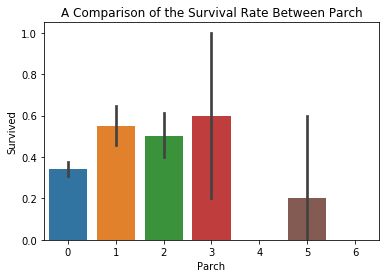

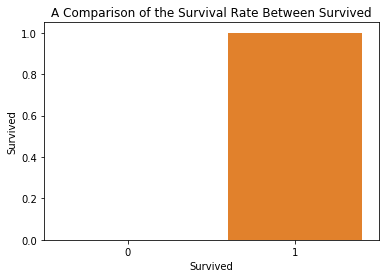

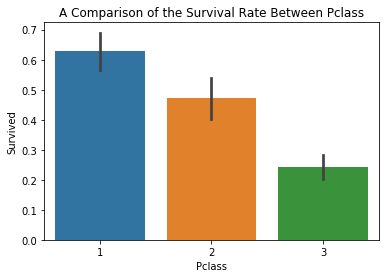

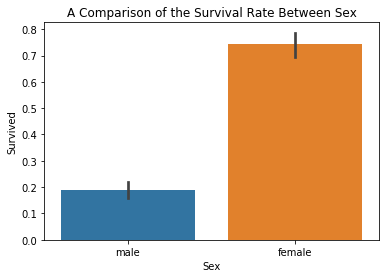

In [32]:
for i in df[col]:
    sns.barplot(i,'Survived',data=df)
    plt.title('A Comparison of the Survival Rate Between ' + i)
    plt.show()

In [33]:
x = df[['Parch','Sex','Ticket','Fare','Pclass','SibSp']]
y = df['Survived']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [35]:
for i in x_train:
    if x_train[i].dtype == 'object':
        print(i)

Sex
Ticket


In [36]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)

ValueError: could not convert string to float: male